In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, ConfusionMatrixDisplay

In [2]:
import os
os.getcwd()

'd:\\Carrera Mates\\Cuarto\\InvOp\\Treball\\git-version\\notebooks'

In [3]:
df_champs=pd.read_csv("../data/champs.csv")

In [4]:
df_champs

,name,id
0,Annie,1
1,Olaf,2
2,Galio,3
3,Twisted Fate,4
4,Xin Zhao,5
...,...,...
133,Kalista,429
134,Bard,432
135,Rakan,497
136,Xayah,498


In [5]:
df_summoners=pd.read_csv("../data/summoners.csv")

In [6]:
df_summoners

,name,key
0,Barrier,21
1,Cleanse,1
2,Disabled Summoner Spells,35
3,Disabled Summoner Spells,36
4,Ignite,14
5,Exhaust,3
6,Flash,4
7,Ghost,6
8,Heal,7
9,Clarity,13


In [7]:
df_summoners=df_summoners.drop([2,3,9,10,11,12,13,15])

In [8]:
df_summoners

,name,key
0,Barrier,21
1,Cleanse,1
4,Ignite,14
5,Exhaust,3
6,Flash,4
7,Ghost,6
8,Heal,7
14,Smite,11
16,Teleport,12


In [9]:
df_items=pd.read_csv("../data/items.csv")

In [10]:
df_items

,Item ID,Name
0,1001,Boots of Speed
1,1004,Faerie Charm
2,1006,Rejuvenation Bead
3,1011,Giant's Belt
4,1018,Cloak of Agility
...,...,...
247,3812,Death's Dance
248,3814,Edge of Night
249,3901,Fire at Will
250,3902,Death's Daughter


In [11]:
df_matches=pd.read_csv("../data/matches.csv")

In [12]:
df_matches

,id,gameid,platformid,queueid,seasonid,duration,creation,version
0,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675
1,11,3187425281,EUW1,420,8,1693,1495066760778,7.10.187.9675
2,12,3187269801,EUW1,420,8,1482,1495053375889,7.10.187.9675
3,13,3187252065,EUW1,420,8,1954,1495050993613,7.10.187.9675
4,14,3187201038,EUW1,420,8,2067,1495047893400,7.10.187.9675
...,...,...,...,...,...,...,...,...
184064,187584,2032413933,NA1,4,6,1399,1449629679777,5.23.0.250
184065,187585,2032380130,NA1,4,6,1172,1449627744183,5.23.0.250
184066,187586,2032238096,NA1,4,6,2027,1449625087744,5.23.0.250
184067,187587,1990558679,NA1,4,5,2761,1445812392811,5.20.0.291


In [13]:
df_matches=df_matches.drop(columns=["gameid","queueid","creation"])

In [14]:
df_matches.rename(columns={"id":"matchid"},inplace=True)

##### For the purposes of this project, the information contained in the dropped columns is not required, as the *id* column already provides a unique identifier for each match. Specifically, *platformid* denotes the server on which the match was played, *seasonid* specifies the season, *duration* indicates the length of the match in seconds, and *version* refers to the corresponding game version.

In [15]:
df_matches_filtrat=df_matches.loc[df_matches["seasonid"]==8]

In [16]:
df_matches_filtrat.loc[df_matches_filtrat["seasonid"] == 8, "seasonid"] = 7

In [17]:
df_matches_filtrat

,matchid,platformid,seasonid,duration,version
0,10,EUW1,7,1909,7.10.187.9675
1,11,EUW1,7,1693,7.10.187.9675
2,12,EUW1,7,1482,7.10.187.9675
3,13,EUW1,7,1954,7.10.187.9675
4,14,EUW1,7,2067,7.10.187.9675
...,...,...,...,...,...
183774,187294,NA1,7,1255,6.24.169.4424
183775,187295,NA1,7,2248,6.24.169.4424
183776,187296,NA1,7,1988,6.24.168.1268
183777,187297,NA1,7,1938,6.24.168.1268


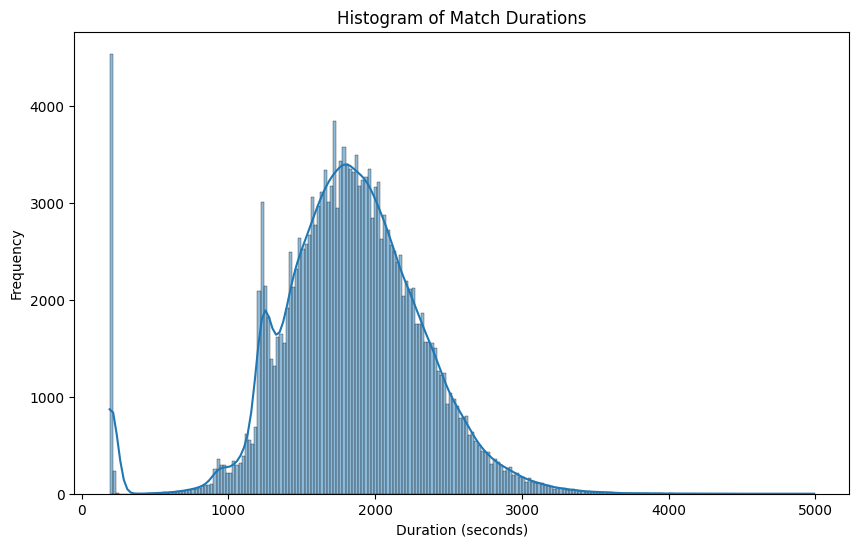

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df_matches_filtrat["duration"], kde=True)
plt.title("Histogram of Match Durations")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.show()

In [20]:
duration=df_matches_filtrat["duration"].describe()

duration

count    173854.000000
mean       1824.079268
std         509.886491
min         190.000000
25%        1536.000000
50%        1830.000000
75%        2135.000000
max        4991.000000
Name: duration, dtype: float64

##### We exclude matches that were not played on patch 7, as the game can change substantially between major patches (e.g., from patch 7.xxxx to patch 8.xxxx). Champion statistics may be adjusted, new elements may be introduced into the game such as neutral objectives, and other significant modifications may occur. However, we include matches from the immediately preceding patch (and season), since the overall game characteristics do not change considerably.

In [21]:
ids_eliminats = df_matches.loc[~df_matches.index.isin(df_matches_filtrat.index), 'matchid']

In [22]:
ids_eliminats

623          633
624          634
625          635
626          636
627          637
           ...  
184064    187584
184065    187585
184066    187586
184067    187587
184068    187588
Name: matchid, Length: 10215, dtype: int64

##### Guardem quins id's hem eliminat per eliminar-los també a la resta de datasets.

In [23]:
df_participants=pd.read_csv("../data/participants.csv")

In [24]:
df_participants

,id,matchid,player,championid,ss1,ss2,role,position
0,9,10,1,19,4,11,NONE,JUNGLE
1,10,10,2,267,3,4,DUO_SUPPORT,BOT
2,11,10,3,119,7,4,DUO_CARRY,BOT
3,12,10,4,114,12,4,SOLO,TOP
4,13,10,5,112,4,3,SOLO,MID
...,...,...,...,...,...,...,...,...
1834515,1865600,187588,6,222,4,7,DUO_CARRY,BOT
1834516,1865601,187588,7,1,14,4,SOLO,MID
1834517,1865602,187588,8,53,4,3,DUO_SUPPORT,BOT
1834518,1865603,187588,9,92,4,11,NONE,JUNGLE


In [25]:
def unir_columnes(col):
    if col["role"] == "SOLO" and col["position"] in ["MID", "TOP"]:
        return col["position"]
    elif col["role"] == "NONE" and col["position"] == "JUNGLE":
        return "JUNGLE"
    elif col["role"] == "DUO_SUPPORT" and col["position"] == "BOT":
        return "SUPPORT"
    elif col["role"] == "DUO_CARRY" and col["position"] == "BOT":
        return "ADC"
    else:
        return None

In [26]:
df_participants['caracola'] = df_participants.apply(unir_columnes, axis=1)

In [27]:
df_participants

,id,matchid,player,championid,ss1,ss2,role,position,caracola
0,9,10,1,19,4,11,NONE,JUNGLE,JUNGLE
1,10,10,2,267,3,4,DUO_SUPPORT,BOT,SUPPORT
2,11,10,3,119,7,4,DUO_CARRY,BOT,ADC
3,12,10,4,114,12,4,SOLO,TOP,TOP
4,13,10,5,112,4,3,SOLO,MID,MID
...,...,...,...,...,...,...,...,...,...
1834515,1865600,187588,6,222,4,7,DUO_CARRY,BOT,ADC
1834516,1865601,187588,7,1,14,4,SOLO,MID,MID
1834517,1865602,187588,8,53,4,3,DUO_SUPPORT,BOT,SUPPORT
1834518,1865603,187588,9,92,4,11,NONE,JUNGLE,JUNGLE


In [28]:
df_participants.drop(columns=["role","position"], inplace=True)

In [29]:
df_participants.rename(columns={"caracola":"role"}, inplace=True)

In [30]:
df_participants

,id,matchid,player,championid,ss1,ss2,role
0,9,10,1,19,4,11,JUNGLE
1,10,10,2,267,3,4,SUPPORT
2,11,10,3,119,7,4,ADC
3,12,10,4,114,12,4,TOP
4,13,10,5,112,4,3,MID
...,...,...,...,...,...,...,...
1834515,1865600,187588,6,222,4,7,ADC
1834516,1865601,187588,7,1,14,4,MID
1834517,1865602,187588,8,53,4,3,SUPPORT
1834518,1865603,187588,9,92,4,11,JUNGLE


##### We merged columns *role* and *position* into a single *role* column.

In [31]:
df_participants_filtrat=df_participants[~df_participants['matchid'].isin(ids_eliminats)]

In [32]:
df_participants_filtrat

,id,matchid,player,championid,ss1,ss2,role
0,9,10,1,19,4,11,JUNGLE
1,10,10,2,267,3,4,SUPPORT
2,11,10,3,119,7,4,ADC
3,12,10,4,114,12,4,TOP
4,13,10,5,112,4,3,MID
...,...,...,...,...,...,...,...
1831615,1862700,187298,6,103,4,14,MID
1831616,1862701,187298,7,78,12,4,TOP
1831617,1862702,187298,8,40,4,3,SUPPORT
1831618,1862703,187298,9,67,7,4,ADC


In [33]:
df_participants_filtrat.head(10)

,id,matchid,player,championid,ss1,ss2,role
0,9,10,1,19,4,11,JUNGLE
1,10,10,2,267,3,4,SUPPORT
2,11,10,3,119,7,4,ADC
3,12,10,4,114,12,4,TOP
4,13,10,5,112,4,3,MID
5,14,10,6,72,11,4,JUNGLE
6,15,10,7,3,4,12,TOP
7,16,10,8,103,14,4,MID
8,17,10,9,222,7,4,ADC
9,18,10,10,161,14,4,SUPPORT


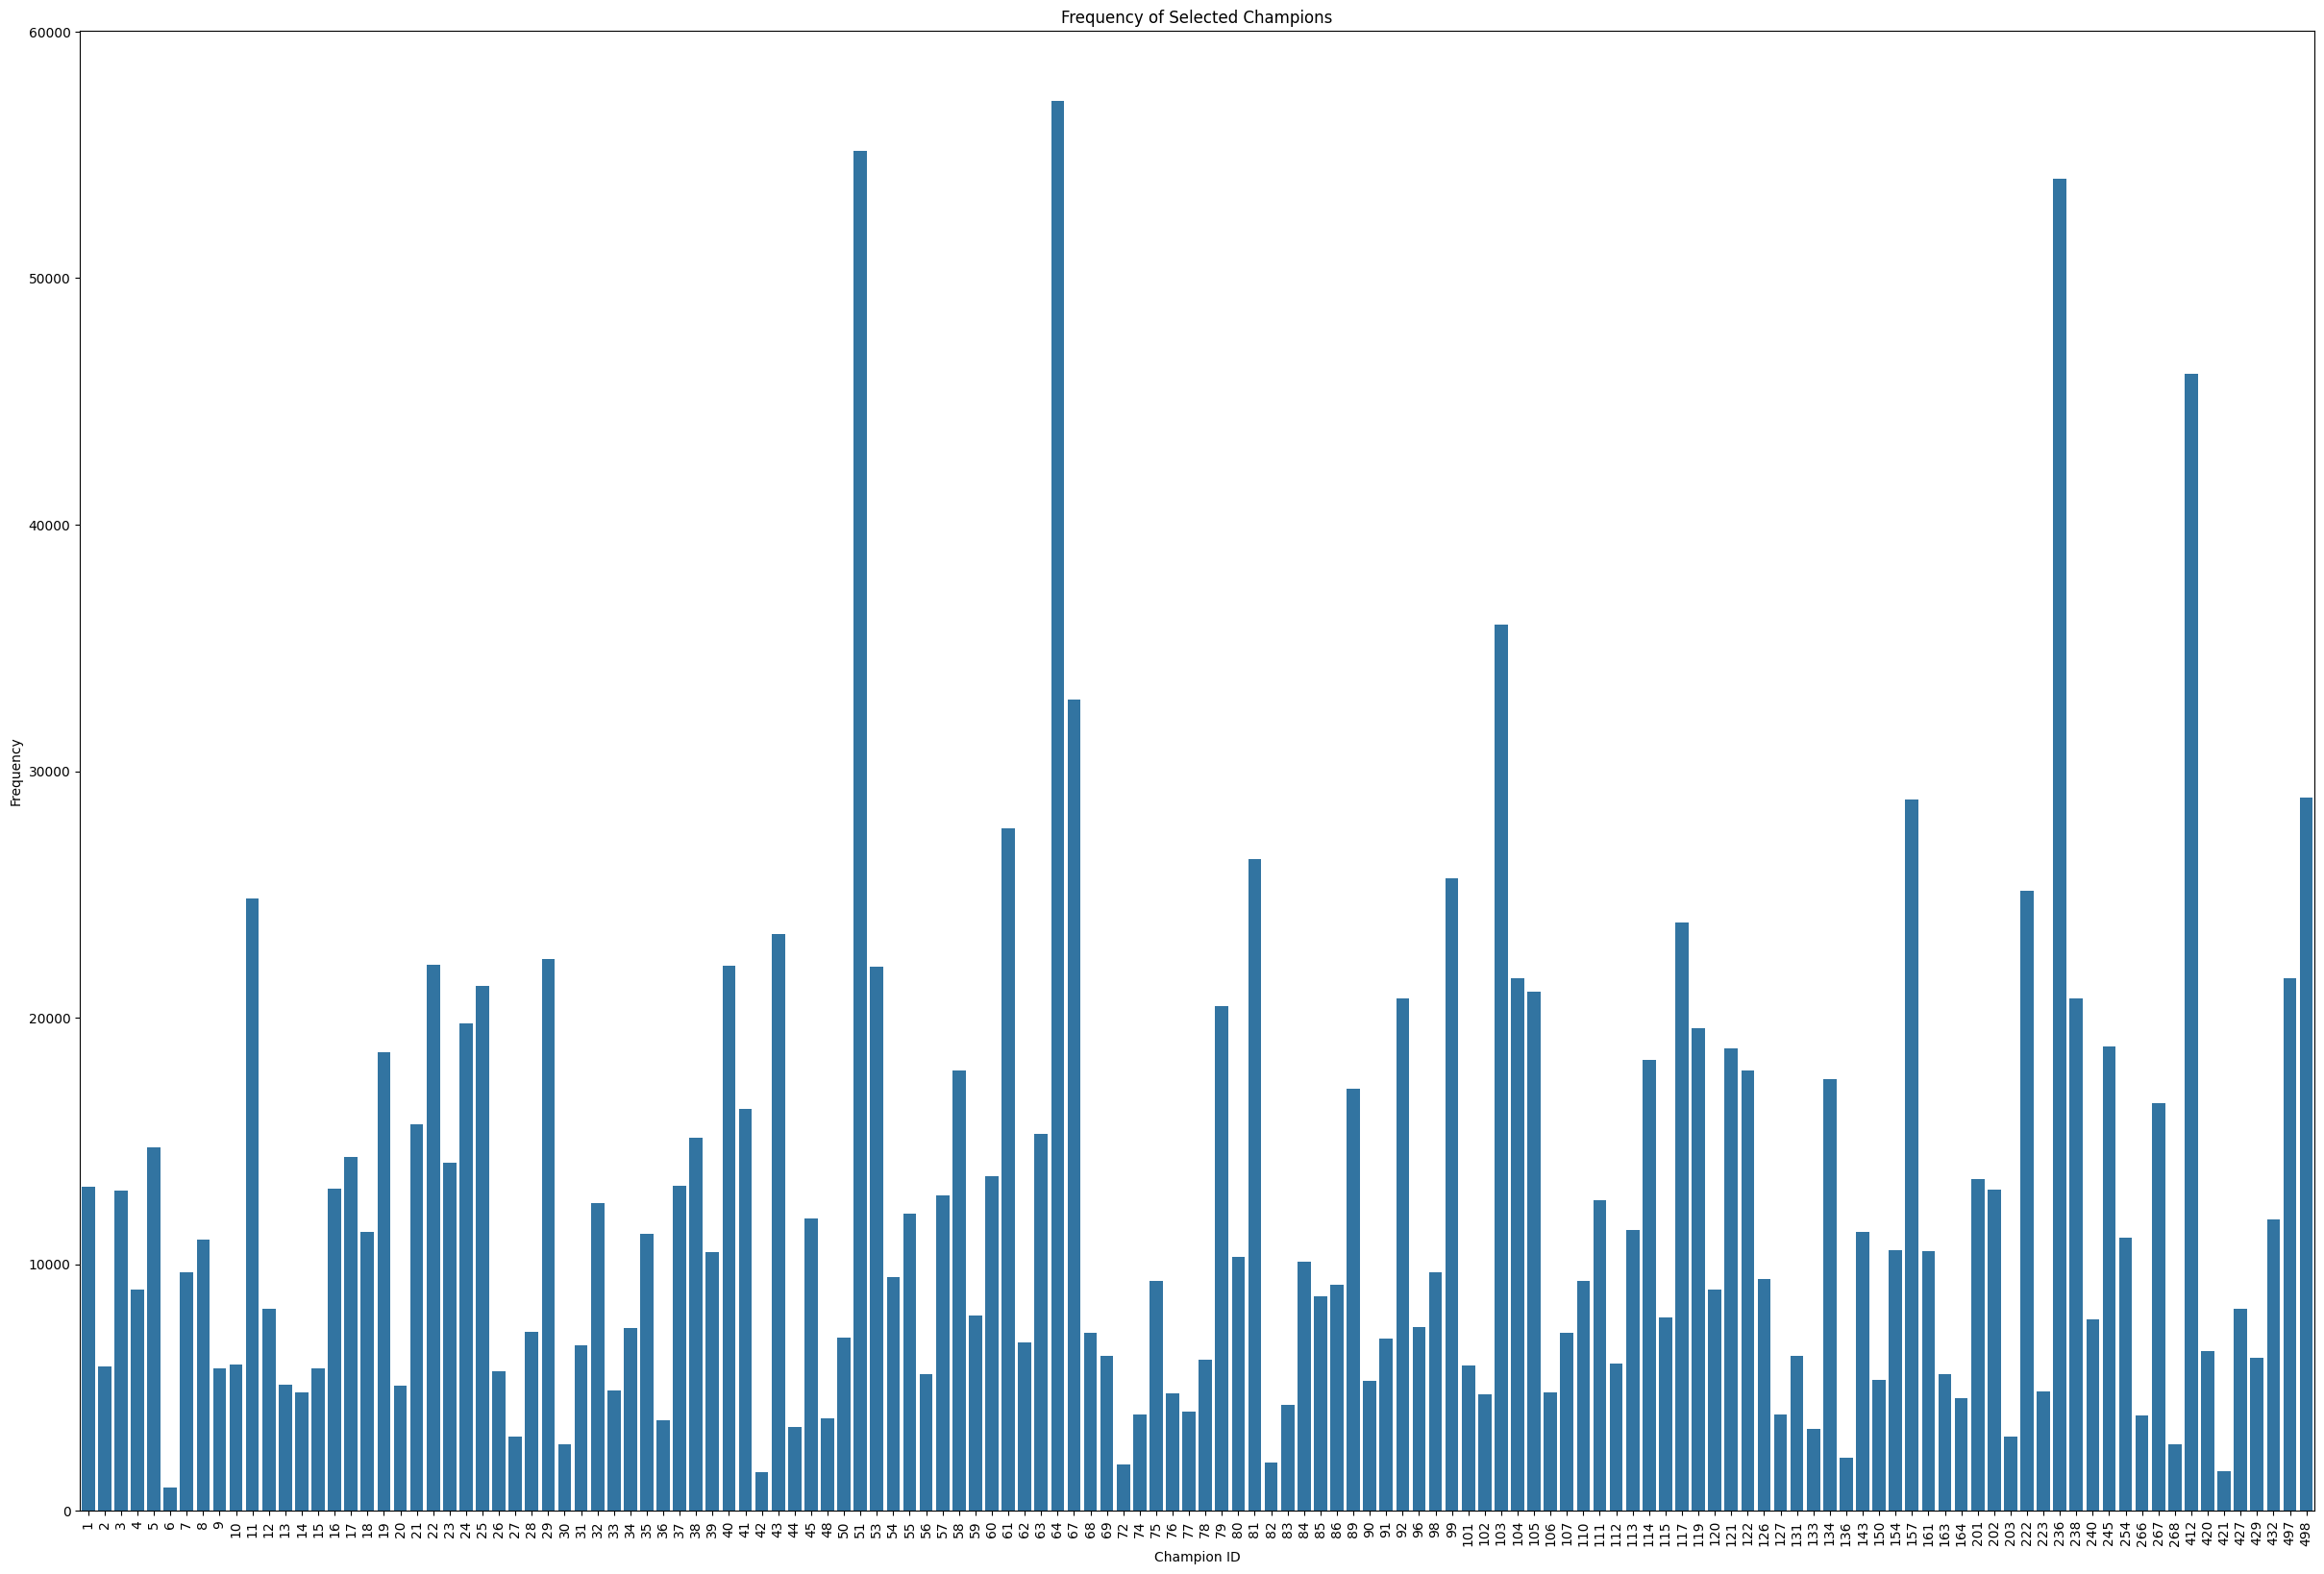

In [35]:
champion_counts=df_participants_filtrat["championid"].value_counts()
plt.figure(figsize=(30, 20))
sns.barplot(x=champion_counts.index, y=champion_counts.values)
plt.title("Frequency of Selected Champions")
plt.xlabel("Champion ID")
plt.ylabel("Frequency")
plt.xticks(rotation=90) 
plt.show()

##### We removed matches from *df_participants* that had already been removed from *df_matches*, ensuring that both datasets contain the same set of matches. Champions can be identified using *championid* in combination with *df_champs*, and similarly, summoner spells (ss1, ss2) can be identified using *df_summoners*.

In [36]:
df_stats1=pd.read_csv("../data/stats1.csv")

In [37]:
df_stats2=pd.read_csv("../data/stats2.csv",low_memory=False)

In [38]:
df_stats=pd.concat([df_stats1,df_stats2])

In [39]:
df_stats.drop(columns=["timecc"], inplace=True)

In [40]:
df_stats

,id,win,item1,item2,item3,item4,item5,item6,trinket,kills,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,9,0,3748,2003,3111,3053,1419,1042,3340,6,...,69,42,27,610,13,0,0,10,0,0
1,10,0,2301,3111,3190,3107,0,0,3364,0,...,1,1,0,211,14,1,0,17,3,0
2,11,0,1055,3072,3006,3031,3046,1036,3340,7,...,3,1,2,182,14,1,0,13,5,0
3,12,0,1029,3078,3156,1001,3053,0,3340,5,...,6,6,0,106,15,0,0,3,0,0
4,13,0,3020,1058,3198,3102,1052,1026,3340,2,...,4,3,1,159,15,0,0,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834513,1865600,0,3035,1053,3031,1304,3102,3046,3363,11,...,27,20,7,127,18,3,\N,13,1,0
834514,1865601,0,3089,3285,3157,1314,1052,0,3340,11,...,3,3,0,128,18,0,\N,13,0,0
834515,1865602,0,1329,3190,3069,3025,1011,3082,3340,4,...,0,0,0,304,17,0,\N,5,0,0
834516,1865603,0,3074,3071,3707,1033,1036,0,3340,2,...,47,40,7,101,15,0,\N,8,1,0


In [41]:
ids_presents=df_participants_filtrat['id'].tolist()

In [42]:
ids_presents

[9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,


In [43]:
df_stats_filtrat=df_stats[df_stats['id'].isin(ids_presents)]

In [44]:
df_stats_filtrat

,id,win,item1,item2,item3,item4,item5,item6,trinket,kills,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,9,0,3748,2003,3111,3053,1419,1042,3340,6,...,69,42,27,610,13,0,0,10,0,0
1,10,0,2301,3111,3190,3107,0,0,3364,0,...,1,1,0,211,14,1,0,17,3,0
2,11,0,1055,3072,3006,3031,3046,1036,3340,7,...,3,1,2,182,14,1,0,13,5,0
3,12,0,1029,3078,3156,1001,3053,0,3340,5,...,6,6,0,106,15,0,0,3,0,0
4,13,0,3020,1058,3198,3102,1052,1026,3340,2,...,4,3,1,159,15,0,0,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831613,1862700,0,3191,3165,3285,3020,3089,1056,3340,11,...,6,6,0,91,15,1,\N,13,2,0
831614,1862701,0,3068,2033,3025,3047,3211,3067,3363,3,...,3,3,0,1905,15,0,\N,9,0,0
831615,1862702,0,2049,3092,0,3158,2055,3504,3364,1,...,0,0,0,162,13,8,\N,20,4,0
831616,1862703,0,3031,3087,3006,3155,3133,0,3363,7,...,2,1,1,7,14,1,\N,12,1,1


In [45]:
df_stats_filtrat.head(10)

,id,win,item1,item2,item3,item4,item5,item6,trinket,kills,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,9,0,3748,2003,3111,3053,1419,1042,3340,6,...,69,42,27,610,13,0,0,10,0,0
1,10,0,2301,3111,3190,3107,0,0,3364,0,...,1,1,0,211,14,1,0,17,3,0
2,11,0,1055,3072,3006,3031,3046,1036,3340,7,...,3,1,2,182,14,1,0,13,5,0
3,12,0,1029,3078,3156,1001,3053,0,3340,5,...,6,6,0,106,15,0,0,3,0,0
4,13,0,3020,1058,3198,3102,1052,1026,3340,2,...,4,3,1,159,15,0,0,10,0,0
5,14,1,1400,3111,3078,3742,1033,3067,3340,3,...,111,81,30,808,16,0,0,8,2,0
6,15,1,3025,3193,3068,3047,1028,3082,3363,4,...,6,0,6,179,16,1,0,7,0,0
7,16,1,3135,3165,3089,3020,1058,3136,3340,13,...,6,3,3,48,17,0,0,8,0,0
8,17,1,3046,3031,3006,3085,3072,1029,3340,15,...,7,2,5,440,16,1,0,6,1,1
9,18,1,1058,2045,3092,3089,3113,3158,3364,4,...,2,1,1,260,16,5,0,25,7,0


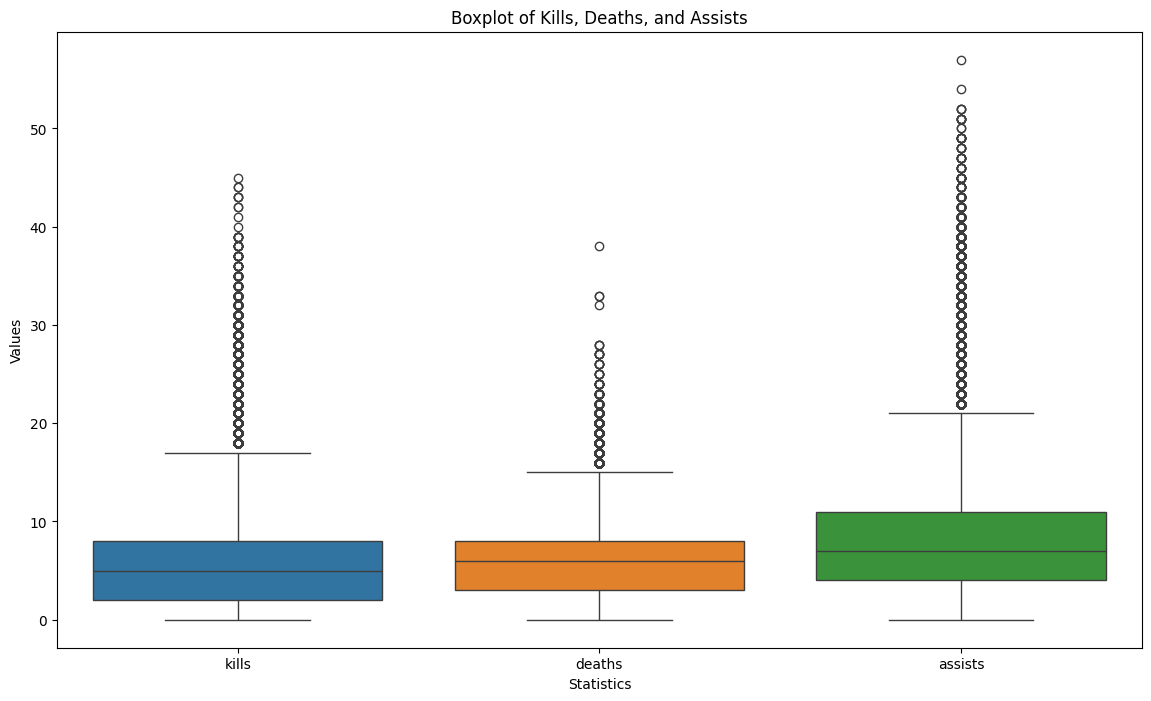

In [47]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_stats_filtrat[["kills", "deaths", "assists"]])
plt.title("Boxplot of Kills, Deaths, and Assists")
plt.xlabel("Statistics")
plt.ylabel("Values")
plt.show()

In [48]:
columnes_eliminades=["id","win","item1", "item2", "item3","item4","item5","item6","trinket"]
# Veiem les dades del que té sentit veure-ho (veure desviació etc de les identificacions dels objectes no 
# té gaire sentit)
stats_descriptives=df_stats_filtrat.drop(columns=columnes_eliminades).iloc[:,38:].describe()

print(stats_descriptives)

       enemyjunglekills  totcctimedealt      champlvl   pinksbought  \
count      1.733655e+06    1.733655e+06  1.733655e+06  1.733655e+06   
mean       7.960522e+00    4.269830e+02  1.418077e+01  9.889597e-01   
std        1.324776e+01    6.591458e+02  3.140447e+00  1.407279e+00   
min        0.000000e+00    0.000000e+00  1.000000e+00  0.000000e+00   
25%        0.000000e+00    1.120000e+02  1.300000e+01  0.000000e+00   
50%        1.000000e+00    2.510000e+02  1.500000e+01  1.000000e+00   
75%        1.000000e+01    5.150000e+02  1.600000e+01  2.000000e+00   
max        1.810000e+02    2.520400e+04  1.800000e+01  5.400000e+01   

        wardsplaced   wardskilled    firstblood  
count  1.733655e+06  1.733655e+06  1.733655e+06  
mean   1.148005e+01  1.769911e+00  9.914429e-02  
std    7.476475e+00  2.186779e+00  2.988557e-01  
min    0.000000e+00  0.000000e+00  0.000000e+00  
25%    7.000000e+00  0.000000e+00  0.000000e+00  
50%    1.000000e+01  1.000000e+00  0.000000e+00  
75%    1.4

##### Once again we keep data only from the matches under analysis. 
##### Observation: There are 3 missing rows compared to *df_participants_filtrat*!

In [49]:
df_teambans=pd.read_csv("../data/teambans.csv")

In [50]:
df_teambans

,matchid,teamid,championid,banturn
0,10,100,11,1
1,10,100,117,3
2,10,100,120,5
3,10,200,84,2
4,10,200,201,4
...,...,...,...,...
1099180,187588,100,55,3
1099181,187588,100,106,5
1099182,187588,200,41,2
1099183,187588,200,82,4


In [51]:
df_teambans["teamid"]=df_teambans["teamid"].replace([100,200],["1","2"])

In [52]:
df_teambans_filtrat=df_teambans[~df_teambans['matchid'].isin(ids_eliminats)]

In [53]:
df_teambans_filtrat

,matchid,teamid,championid,banturn
0,10,1,11,1
1,10,1,117,3
2,10,1,120,5
3,10,2,84,2
4,10,2,201,4
...,...,...,...,...
1098004,187298,1,107,3
1098005,187298,1,122,5
1098006,187298,2,13,2
1098007,187298,2,1,4


##### Here, we identify the characters that have been banned. Each team is allowed to ban up to five characters.

In [54]:
df_teamstats=pd.read_csv("../data/teamstats.csv")

In [55]:
df_teamstats

,matchid,teamid,firstblood,firsttower,firstinhib,firstbaron,firstdragon,firstharry,towerkills,inhibkills,baronkills,dragonkills,harrykills
0,10,100,0,1,0,0,0,0,5,0,0,0,0
1,10,200,1,0,1,1,1,1,10,3,1,3,1
2,11,100,1,0,0,0,0,0,2,0,0,0,0
3,11,200,0,1,1,0,1,0,10,3,0,2,0
4,12,100,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368133,187586,200,0,0,0,0,0,0,1,0,0,0,0
368134,187587,100,1,0,1,1,0,0,10,1,1,2,0
368135,187587,200,0,1,0,0,1,0,3,0,1,3,0
368136,187588,100,1,0,1,1,0,0,11,3,2,3,0


In [56]:
df_teamstats["teamid"]=df_teamstats["teamid"].replace([100,200],["1","2"])

In [57]:
df_teamstats

,matchid,teamid,firstblood,firsttower,firstinhib,firstbaron,firstdragon,firstharry,towerkills,inhibkills,baronkills,dragonkills,harrykills
0,10,1,0,1,0,0,0,0,5,0,0,0,0
1,10,2,1,0,1,1,1,1,10,3,1,3,1
2,11,1,1,0,0,0,0,0,2,0,0,0,0
3,11,2,0,1,1,0,1,0,10,3,0,2,0
4,12,1,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368133,187586,2,0,0,0,0,0,0,1,0,0,0,0
368134,187587,1,1,0,1,1,0,0,10,1,1,2,0
368135,187587,2,0,1,0,0,1,0,3,0,1,3,0
368136,187588,1,1,0,1,1,0,0,11,3,2,3,0


In [58]:
df_teamstats_filtrat=df_teamstats[~df_teamstats['matchid'].isin(ids_eliminats)]

In [59]:
df_teamstats_filtrat

,matchid,teamid,firstblood,firsttower,firstinhib,firstbaron,firstdragon,firstharry,towerkills,inhibkills,baronkills,dragonkills,harrykills
0,10,1,0,1,0,0,0,0,5,0,0,0,0
1,10,2,1,0,1,1,1,1,10,3,1,3,1
2,11,1,1,0,0,0,0,0,2,0,0,0,0
3,11,2,0,1,1,0,1,0,10,3,0,2,0
4,12,1,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
367553,187296,2,1,1,0,0,0,0,5,0,0,1,0
367554,187297,1,1,0,1,0,0,0,11,3,0,2,0
367555,187297,2,0,1,0,0,1,0,3,0,0,1,0
367556,187298,1,0,1,1,1,1,1,9,2,1,2,1


In [60]:
df_teamstats_filtrat_descriptives=df_teamstats_filtrat.iloc[:,8:-1].describe()
print(df_teamstats_filtrat_descriptives)

          towerkills     inhibkills     baronkills    dragonkills
count  347708.000000  347708.000000  347708.000000  347708.000000
mean        5.750443       1.037342       0.413586       1.427442
std         3.879078       1.259764       0.606906       1.231706
min         0.000000       0.000000       0.000000       0.000000
25%         2.000000       0.000000       0.000000       0.000000
50%         6.000000       1.000000       0.000000       1.000000
75%         9.000000       2.000000       1.000000       2.000000
max        11.000000      13.000000       5.000000       7.000000


### Merging dataframes into a single dataset using matchid as the key:

In [61]:
df_players = df_participants_filtrat.merge(df_stats_filtrat, on="id", how="left")

In [62]:
df_players.head(20)

,id,matchid,player,championid,ss1,ss2,role,win,item1,item2,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,9,10,1,19,4,11,JUNGLE,0.0,3748.0,2003.0,...,69.0,42.0,27.0,610.0,13.0,0.0,0,10.0,0.0,0.0
1,10,10,2,267,3,4,SUPPORT,0.0,2301.0,3111.0,...,1.0,1.0,0.0,211.0,14.0,1.0,0,17.0,3.0,0.0
2,11,10,3,119,7,4,ADC,0.0,1055.0,3072.0,...,3.0,1.0,2.0,182.0,14.0,1.0,0,13.0,5.0,0.0
3,12,10,4,114,12,4,TOP,0.0,1029.0,3078.0,...,6.0,6.0,0.0,106.0,15.0,0.0,0,3.0,0.0,0.0
4,13,10,5,112,4,3,MID,0.0,3020.0,1058.0,...,4.0,3.0,1.0,159.0,15.0,0.0,0,10.0,0.0,0.0
5,14,10,6,72,11,4,JUNGLE,1.0,1400.0,3111.0,...,111.0,81.0,30.0,808.0,16.0,0.0,0,8.0,2.0,0.0
6,15,10,7,3,4,12,TOP,1.0,3025.0,3193.0,...,6.0,0.0,6.0,179.0,16.0,1.0,0,7.0,0.0,0.0
7,16,10,8,103,14,4,MID,1.0,3135.0,3165.0,...,6.0,3.0,3.0,48.0,17.0,0.0,0,8.0,0.0,0.0
8,17,10,9,222,7,4,ADC,1.0,3046.0,3031.0,...,7.0,2.0,5.0,440.0,16.0,1.0,0,6.0,1.0,1.0
9,18,10,10,161,14,4,SUPPORT,1.0,1058.0,2045.0,...,2.0,1.0,1.0,260.0,16.0,5.0,0,25.0,7.0,0.0


In [64]:
df_players["teamid"] = 0 


##### A new column is added to indicate the team to which each player belonged. Note that *df_players* is grouped in blocks of 10 per match and in blocks of 5 per team. Therefore, we can use the *matchid* in combination with *teamstats* and *firstblood* to determine which player secured the first blood. By referencing *teamstats*, we can identify the corresponding team, and depending on the player's number, we can distinguish between the two teams.

In [65]:
df_firstblood=df_players[["id","matchid","player","role","firstblood","teamid"]]
df_firstblood.head(10)

,id,matchid,player,role,firstblood,teamid
0,9,10,1,JUNGLE,0.0,0
1,10,10,2,SUPPORT,0.0,0
2,11,10,3,ADC,0.0,0
3,12,10,4,TOP,0.0,0
4,13,10,5,MID,0.0,0
5,14,10,6,JUNGLE,0.0,0
6,15,10,7,TOP,0.0,0
7,16,10,8,MID,0.0,0
8,17,10,9,ADC,1.0,0
9,18,10,10,SUPPORT,0.0,0


In [66]:
df_FBteams=df_teamstats_filtrat[["matchid","teamid","firstblood"]]
df_FBteams.head(2)

,matchid,teamid,firstblood
0,10,1,0
1,10,2,1


In [ ]:
def assign_firstblood_teams(df_players, df_FBteams):
    df_result = df_players.copy()
    for idx, row in df_result[df_result['firstblood'] == 1].iterrows():
        match_id = row['matchid']
        team_with_firstblood = df_FBteams.loc[
            (df_FBteams['matchid'] == match_id) & (df_FBteams['firstblood'] == 1),
            'teamid'
        ].values
        if len(team_with_firstblood) > 0:
            df_result.at[idx, 'teamid'] = int(team_with_firstblood[0])    
    return df_result

df_players_with_teams = assign_firstblood_teams(df_firstblood, df_FBteams)

df_players_with_teams.head(10)

,id,matchid,player,role,firstblood,teamid
0,9,10,1,JUNGLE,0.0,0
1,10,10,2,SUPPORT,0.0,0
2,11,10,3,ADC,0.0,0
3,12,10,4,TOP,0.0,0
4,13,10,5,MID,0.0,0
5,14,10,6,JUNGLE,0.0,0
6,15,10,7,TOP,0.0,0
7,16,10,8,MID,0.0,0
8,17,10,9,ADC,1.0,2
9,18,10,10,SUPPORT,0.0,0


In [68]:
df_players_with_teams.count()

id            1733658
matchid       1733658
player        1733658
role          1656742
firstblood    1733655
teamid        1733658
dtype: int64

In [ ]:
def extend_team_values(df):
    df_result = df.copy()

    for match_id in df_result['matchid'].unique():
        match_players = df_result[df_result['matchid'] == match_id]
        for idx, row in match_players[match_players['teamid'] != 0].iterrows():
            player_id = row['player'] 
            team_id = row['teamid'] 
            if 1 <= player_id <= 5:
                df_result.loc[(df_result['matchid'] == match_id) & (df_result['player'].between(1, 5)), 'teamid'] = team_id
            elif 6 <= player_id <= 10:
                df_result.loc[(df_result['matchid'] == match_id) & (df_result['player'].between(6, 10)), 'teamid'] = team_id
    return df_result

df_players_extended = extend_team_values(df_players_with_teams)
# 47 minutes executing !

,id,matchid,player,role,firstblood,teamid
0,9,10,1,JUNGLE,0.0,0
1,10,10,2,SUPPORT,0.0,0
2,11,10,3,ADC,0.0,0
3,12,10,4,TOP,0.0,0
4,13,10,5,MID,0.0,0
5,14,10,6,JUNGLE,0.0,2
6,15,10,7,TOP,0.0,2
7,16,10,8,MID,0.0,2
8,17,10,9,ADC,1.0,2
9,18,10,10,SUPPORT,0.0,2


In [70]:
df_players_extended.head(20)

,id,matchid,player,role,firstblood,teamid
0,9,10,1,JUNGLE,0.0,0
1,10,10,2,SUPPORT,0.0,0
2,11,10,3,ADC,0.0,0
3,12,10,4,TOP,0.0,0
4,13,10,5,MID,0.0,0
5,14,10,6,JUNGLE,0.0,2
6,15,10,7,TOP,0.0,2
7,16,10,8,MID,0.0,2
8,17,10,9,ADC,1.0,2
9,18,10,10,SUPPORT,0.0,2


In [ ]:
def fill_missing_teams(df):
    df_result = df.copy()

    for match_id in df_result['matchid'].unique():
        match_players = df_result[df_result['matchid'] == match_id]        
        team_1_5 = match_players.loc[match_players['player'].between(1, 5), 'teamid'].max()
        team_6_10 = match_players.loc[match_players['player'].between(6, 10), 'teamid'].max()
        if team_1_5 == 0 and team_6_10 != 0:
            df_result.loc[(df_result['matchid'] == match_id) & df_result['player'].between(1, 5), 'teamid'] = 3 - team_6_10
        if team_6_10 == 0 and team_1_5 != 0:
            df_result.loc[(df_result['matchid'] == match_id) & df_result['player'].between(6, 10), 'teamid'] = 3 - team_1_5
    return df_result
    
df_players_filled = fill_missing_teams(df_players_extended)
# 44 minutes executing !

In [72]:
df_players_filled.head(20)

,id,matchid,player,role,firstblood,teamid
0,9,10,1,JUNGLE,0.0,1.0
1,10,10,2,SUPPORT,0.0,1.0
2,11,10,3,ADC,0.0,1.0
3,12,10,4,TOP,0.0,1.0
4,13,10,5,MID,0.0,1.0
5,14,10,6,JUNGLE,0.0,2.0
6,15,10,7,TOP,0.0,2.0
7,16,10,8,MID,0.0,2.0
8,17,10,9,ADC,1.0,2.0
9,18,10,10,SUPPORT,0.0,2.0


In [73]:
df_players['teamid'] = df_players_filled['teamid'].values
df_players.head(10)

,id,matchid,player,championid,ss1,ss2,role,win,item1,item2,...,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood,teamid
0,9,10,1,19,4,11,JUNGLE,0.0,3748.0,2003.0,...,42.0,27.0,610.0,13.0,0.0,0,10.0,0.0,0.0,1.0
1,10,10,2,267,3,4,SUPPORT,0.0,2301.0,3111.0,...,1.0,0.0,211.0,14.0,1.0,0,17.0,3.0,0.0,1.0
2,11,10,3,119,7,4,ADC,0.0,1055.0,3072.0,...,1.0,2.0,182.0,14.0,1.0,0,13.0,5.0,0.0,1.0
3,12,10,4,114,12,4,TOP,0.0,1029.0,3078.0,...,6.0,0.0,106.0,15.0,0.0,0,3.0,0.0,0.0,1.0
4,13,10,5,112,4,3,MID,0.0,3020.0,1058.0,...,3.0,1.0,159.0,15.0,0.0,0,10.0,0.0,0.0,1.0
5,14,10,6,72,11,4,JUNGLE,1.0,1400.0,3111.0,...,81.0,30.0,808.0,16.0,0.0,0,8.0,2.0,0.0,2.0
6,15,10,7,3,4,12,TOP,1.0,3025.0,3193.0,...,0.0,6.0,179.0,16.0,1.0,0,7.0,0.0,0.0,2.0
7,16,10,8,103,14,4,MID,1.0,3135.0,3165.0,...,3.0,3.0,48.0,17.0,0.0,0,8.0,0.0,0.0,2.0
8,17,10,9,222,7,4,ADC,1.0,3046.0,3031.0,...,2.0,5.0,440.0,16.0,1.0,0,6.0,1.0,1.0,2.0
9,18,10,10,161,14,4,SUPPORT,1.0,1058.0,2045.0,...,1.0,1.0,260.0,16.0,5.0,0,25.0,7.0,0.0,2.0


##### We keep merging into one data set and fixing errors:

In [74]:
print(df_players[df_players["teamid"].isna()])
print(df_teamstats_filtrat[df_teamstats_filtrat["teamid"].isna()])

              id  matchid  player  championid  ss1  ss2     role  win   item1  \
1226456  1272014   127704       1          67   12    4      TOP  0.0  3116.0   
1226616  1272174   127721       1          99    4    3  SUPPORT  1.0  3092.0   
1226617  1272175   127721       2           5    4   11   JUNGLE  NaN     NaN   

          item2  ...  ownjunglekills  enemyjunglekills  totcctimedealt  \
1226456  3020.0  ...             0.0               0.0           368.0   
1226616  3047.0  ...             0.0               0.0           167.0   
1226617     NaN  ...             NaN               NaN             NaN   

         champlvl  pinksbought  wardsbought  wardsplaced  wardskilled  \
1226456      17.0          0.0            0         13.0          1.0   
1226616      12.0          0.0            0          9.0          1.0   
1226617       NaN          NaN          NaN          NaN          NaN   

         firstblood  teamid  
1226456         0.0     NaN  
1226616         0.0     N

In [75]:
df_players = df_players.dropna(subset=["teamid"])
df_teamstats_filtrat = df_teamstats_filtrat.dropna(subset=["teamid"])

In [76]:
df_players.loc[:, "teamid"] = df_players["teamid"].astype(int)
df_teamstats_filtrat.loc[:, "teamid"] = df_teamstats_filtrat["teamid"].astype(int)

df_players_grouped = df_players.merge(df_teamstats_filtrat, on=["matchid", "teamid"], how="left")

In [77]:
df_players_grouped.head(10)

,id,matchid,player,championid,ss1,ss2,role,win,item1,item2,...,firsttower,firstinhib,firstbaron,firstdragon,firstharry,towerkills,inhibkills_y,baronkills,dragonkills,harrykills
0,9,10,1,19,4,11,JUNGLE,0.0,3748.0,2003.0,...,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
1,10,10,2,267,3,4,SUPPORT,0.0,2301.0,3111.0,...,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
2,11,10,3,119,7,4,ADC,0.0,1055.0,3072.0,...,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
3,12,10,4,114,12,4,TOP,0.0,1029.0,3078.0,...,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
4,13,10,5,112,4,3,MID,0.0,3020.0,1058.0,...,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
5,14,10,6,72,11,4,JUNGLE,1.0,1400.0,3111.0,...,0.0,1.0,1.0,1.0,1.0,10.0,3.0,1.0,3.0,1.0
6,15,10,7,3,4,12,TOP,1.0,3025.0,3193.0,...,0.0,1.0,1.0,1.0,1.0,10.0,3.0,1.0,3.0,1.0
7,16,10,8,103,14,4,MID,1.0,3135.0,3165.0,...,0.0,1.0,1.0,1.0,1.0,10.0,3.0,1.0,3.0,1.0
8,17,10,9,222,7,4,ADC,1.0,3046.0,3031.0,...,0.0,1.0,1.0,1.0,1.0,10.0,3.0,1.0,3.0,1.0
9,18,10,10,161,14,4,SUPPORT,1.0,1058.0,2045.0,...,0.0,1.0,1.0,1.0,1.0,10.0,3.0,1.0,3.0,1.0


In [78]:
print(df_players_grouped.columns)

Index(['id', 'matchid', 'player', 'championid', 'ss1', 'ss2', 'role', 'win',
       'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'trinket',
       'kills', 'deaths', 'assists', 'largestkillingspree', 'largestmultikill',
       'killingsprees', 'longesttimespentliving', 'doublekills', 'triplekills',
       'quadrakills', 'pentakills', 'legendarykills', 'totdmgdealt',
       'magicdmgdealt', 'physicaldmgdealt', 'truedmgdealt', 'largestcrit',
       'totdmgtochamp', 'magicdmgtochamp', 'physdmgtochamp', 'truedmgtochamp',
       'totheal', 'totunitshealed', 'dmgselfmit', 'dmgtoobj', 'dmgtoturrets',
       'visionscore', 'totdmgtaken', 'magicdmgtaken', 'physdmgtaken',
       'truedmgtaken', 'goldearned', 'goldspent', 'turretkills',
       'inhibkills_x', 'totminionskilled', 'neutralminionskilled',
       'ownjunglekills', 'enemyjunglekills', 'totcctimedealt', 'champlvl',
       'pinksbought', 'wardsbought', 'wardsplaced', 'wardskilled',
       'firstblood_x', 'teamid', 'firstblood_y

##### We convert *championid*, *items*, *ss1* i *ss2* into categorical variables.

In [79]:
df_players_grouped['championid'] = df_players_grouped['championid'].map(
    df_champs.set_index('id')['name']
)

df_players_grouped['ss1'] = df_players_grouped['ss1'].map(
    df_summoners.set_index('key')['name']
)
df_players_grouped['ss2'] = df_players_grouped['ss2'].map(
    df_summoners.set_index('key')['name']
)
for col in ['item1', 'item2', 'item3', 'item4', 'item5', 'item6']:
    df_players_grouped[col] = df_players_grouped[col].map(
        df_items.set_index('Item ID')['Name']
    )

##### We remove the rows where win is NaN (which are present). Since we will not modify this data further, we export it as a CSV file for future reference

In [80]:
df_players_grouped = df_players_grouped.dropna(subset=["win"])  
X = df_players_grouped.drop(columns=["win", "matchid", "id", "player"]) 
y = df_players_grouped["win"] 
df_players_grouped.to_csv('../data/playersgrouped.csv',index=False)

In [81]:
len(df_players_grouped.columns)

73

In [82]:
X=pd.get_dummies(X)

In [ ]:
len(X.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestClassifier(n_estimators=45, random_state=42) #Fem n_estimators=45 per què per 100, que sol ser el cas general, 
# tarda massa en carregar. Igualment amb 45 pot tardar.
rf.fit(X_train, y_train)

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
accuracy1=accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy1:.4f}")  # Precisió del model

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
importances1=rf.feature_importances_
indexs1=importances1.argsort()

In [ ]:
n=10
features1=X.columns
top_n_indexs1=indexs1[-n:]
plt.figure(figsize=(10, 5))
plt.barh(range(len(top_n_indexs1)), importances1[top_n_indexs1], align="center")
plt.yticks(range(len(top_n_indexs1)), features1[top_n_indexs1])
plt.xlabel("Importance")
plt.title("Importance of Features (Top 45)")
plt.show()

##### We observe that there is a large number of variables that are not particularly relevant (especially all the item-related ones). Based on this histogram, together with our understanding of what each variable represents, we perform a manual selection of the most important ones and train a model using only these variables.

In [ ]:
df_players_grouped_filtrat = df_players_grouped.filter(items=[
    'championid', 'role', 'win', 'totdmgdealt', 'totheal', 'visionscore',
    'totdmgtaken', 'goldearned', 'towerkills', 'inhibkills_y', 'firsttower',
    'firstinhib', 'firstbaron', 'firstdragon', 'baronkills', 'dragonkills',
    'harrykills', 'firstblood_y', 'totcctimedealt'
])

In [ ]:
df_players_grouped_filtrat['kda']=(df_players_grouped['kills']+df_players_grouped['assists'])/df_players_grouped['deaths'].replace(0, 1) #afegim una nova
# Columna per agrupar les variables kills, deaths

In [ ]:
df_players_grouped_filtrat.head(10) # Aquí podem veure la informació més rellevant de la primera partida.

In [ ]:
df_players_grouped_filtrat.tail(10) # Aquí podem veure la informació més rellevant de la última partida.

In [ ]:
X2=df_players_grouped_filtrat.drop(columns=["win"])
y2=df_players_grouped_filtrat["win"] 
df_players_grouped_filtrat.to_csv('playersgroupedFILT.csv',index=False)

In [ ]:
X2=pd.get_dummies(X2)

In [ ]:
len(X2.columns)

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [ ]:
rf2=RandomForestClassifier(n_estimators=100, random_state=42)
rf2.fit(X_train2, y_train2)

In [ ]:
y_pred2=rf2.predict(X_test2)

In [ ]:
accuracy2=accuracy_score(y_test2, y_pred2)
print(f"Accuracy: {accuracy2:.4f}")  # Precisió del model

print("\nClassification Report:")
print(classification_report(y_test2, y_pred2))

In [ ]:
importances2=rf2.feature_importances_
indexs2=importances2.argsort()

In [ ]:
n=10 
features2=X2.columns
indexs2=importances2.argsort()
top_n_indexs2=indexs2[-n:]

plt.figure(figsize=(10, 6))
plt.barh(range(len(top_n_indexs2)), importances2[top_n_indexs2], align="center")
plt.yticks(range(len(top_n_indexs2)), features2[top_n_indexs2])
plt.xlabel("Importància")
plt.title("Importància de les Variables (Top 10)")
plt.show()

##### As expected, the most relevant data correspond to the destroyed structures. We proceed to build a model without including this information.

In [ ]:
df = df_players_grouped.filter(items=[
    'championid', 'role', 'win', 'totdmgdealt', 'totheal', 'visionscore',
    'totdmgtaken', 'goldearned', 'firstbaron', 'firstdragon', 'baronkills', 'dragonkills',
    'harrykills', 'firstblood_y', 'totcctimedealt'
])

In [ ]:
df['kda']=(df_players_grouped['kills']+df_players_grouped['assists'])/df_players_grouped['deaths'].replace(0, 1)

In [ ]:
Xdf=df.drop(columns=["win"])
ydf=df["win"] 
df.to_csv('dfModelFinal.csv',index=False)

In [ ]:
Xdf=pd.get_dummies(Xdf)
len(Xdf.columns)

In [ ]:
X_traindf, X_testdf, y_traindf, y_testdf = train_test_split(Xdf, ydf, test_size=0.2, random_state=42)

In [ ]:
RF=RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X_traindf, y_traindf)

In [ ]:
y_preddf=RF.predict(X_testdf)

In [ ]:
accuracydf=accuracy_score(y_testdf, y_preddf)
print(f"Accuracy: {accuracydf:.4f}")  # Precisió del model

print("\nClassification Report:")
print(classification_report(y_testdf, y_preddf))

In [ ]:
Importancesdf=RF.feature_importances_
indexsdf=Importancesdf.argsort()

In [ ]:
n=10 
featuresdf=Xdf.columns

top_n_indexsdf=indexsdf[-n:]


plt.figure(figsize=(10, 6))
plt.barh(range(len(top_n_indexsdf)), Importancesdf[top_n_indexsdf], align="center")
plt.yticks(range(len(top_n_indexsdf)), featuresdf[top_n_indexsdf])
plt.xlabel("Importància")
plt.title("Importància de les Variables (Top 10)")
plt.show()

In [ ]:
Features=Xdf.columns

indexs=Importancesdf.argsort()

plt.figure(figsize=(10, 30))
plt.barh(range(len(indexs)), Importancesdf[indexs], align="center")
plt.yticks(range(len(indexs)), Features[indexs])
plt.xlabel("Importància")
plt.title("Importància de les Variables")
plt.show()